In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cbook as cbook
from matplotlib import pyplot as plt
from matplotlib import image as image

In [25]:
analytics = pd.read_csv('../Data/Paper_Analytics/analytics_medxriv_deductive_modeling.txt')

analytics['Year'] = pd.DatetimeIndex(analytics['Month']).year
analytics['Month'] = pd.DatetimeIndex(analytics['Month']).month

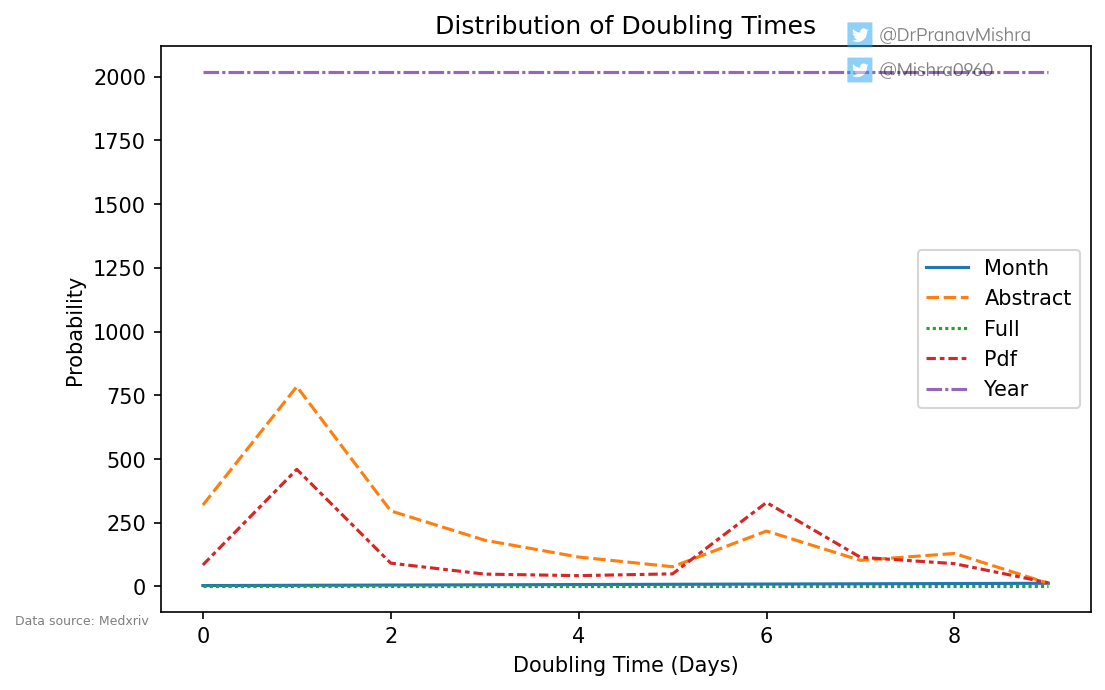

In [33]:
data = analytics.melt(id_vars=['Month'], value_vars=['Abstract', 'Pdf'])

#Formatting the following figures

axes_fontsize = 15
title_fontsize = 20
label_size = 10
fig_dpi = 150
fig_width = 8
fig_height = 5
twitter_alpha = .5

india_color = "#FF8F1C"
usa_color = "#041E42"

data_source = "Data source: Medxriv"


with cbook.get_sample_data('Twitter/twitter_watermark_black.png') as file:
    twitter = image.imread(file)

#Plotting the figure

fig1, ax1 = plt.subplots(figsize=(fig_width, fig_height), dpi = fig_dpi)

fig1 = sns.lineplot(data = analytics, x="Month", y='value', hue='var')
plt.title('Distribution of Doubling Times')
ax1.set_xlabel("Doubling Time (Days)")
ax1.set_ylabel("Probability")

fig1 = fig1.get_figure()


#JHU Source
plt.text(-2, -150, data_source, zorder=1, alpha=twitter_alpha, fontsize=6)

#Twitter Watermark
[twitter_width, twitter_height] = fig1.get_size_inches()*fig1.dpi
twitter_width = (twitter_width*.7).round(0)
twitter_height = (twitter_height*.8).round(0)

fig1.figimage(twitter, twitter_width, twitter_height, zorder=4, alpha=twitter_alpha) 


fig1.savefig('../Data/Paper_Analytics/analytics.jpg', bbox_inches="tight", pad_inches=0.3, transparent=False)